**Boston Housing Study 2 (Python)**


**This study uses data from the Boston Housing Study case as described in "Marketing Data Science: Modeling Techniques for Predictive Analytics with R and Python" (Miller 2015) to evaluate four regression modeling methodes, including Stochastic Gradient Descent, Lasso Regression, Random Forest, and Gradiant Boosting Regressor. An alternative version of Random forest and Gradiant Boosting Regressor with different hyperparameter settings are also included for comaprison purpose. These methods are evaluated within a 5-fold cross-validation design, using root mean-squared error (RMSE) as an index of prediction error.**

**The results show that the performance of Random Forests and Gradient Boosting methods are highly impacted by their hyperparameter settings. They can either outperform or underperform SGD and Lasso, depending on the values assigned to hyperparameter(s). The better-performed Random Forest model and better_performed Gradient Boosting model are each applied to the full data set, with Gradient Boosting model reaches 1.0 perfect explained_variance score, outperforming Random Forest model. Therefore, Gradient Boosting method is the recommended method to use.**

**Both Random Forest and Gradient Boosting methods indentified criminal as the most important feature in predicting house value. Age is recognized by both models as the second important explainatory variable in predicting house values.** 


*Seed value for random number generators to obtain reproducible results*

In [1]:
RANDOM_SEED = 1

*Import base packages into the namespace for this program*

In [2]:
import numpy as np
import pandas as pd

*Read data for the Boston Housing Study*

In [3]:
boston_input = pd.read_csv('boston.csv')

*Drop neighborhood from the data being considered*

In [4]:
boston = boston_input.drop('neighborhood', 1)
print('\nGeneral description of the boston DataFrame:')
print(boston.info())


General description of the boston DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rooms      506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
lstat      506 non-null float64
mv         506 non-null float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB
None


In [5]:
print('\nDescriptive statistics of the boston DataFrame:')
print(boston.describe())


Descriptive statistics of the boston DataFrame:
             crim          zn       indus        chas         nox       rooms  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       lstat  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.

*Set up preliminary data for data for fitting the models. Let the first column is the median housing value response, and the remaining columns are the explanatory variables*

In [6]:
prelim_model_data = np.array([boston.mv,\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

In [7]:
print('\nData dimensions:', prelim_model_data.shape)


Data dimensions: (506, 13)


In [8]:
model_data = prelim_model_data

*Set up the regression modeling methods: stochastic gradient descent, lasso Regression, random forest, and gradiant boosting regressor.*

In [29]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

names = ["SDG", "Lasso", "RandomForest1", "RandomForest2", 
         'GradientBoosting1', 'GradientBoosting2']
classifiers = [SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, 
                            random_state=RANDOM_SEED),
               Lasso(alpha=0.1, random_state=RANDOM_SEED),
               RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, 
                                     max_features = 4, random_state=RANDOM_SEED),
               RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, 
                                     max_features = 1, random_state=RANDOM_SEED),
               GradientBoostingRegressor(max_depth=5, n_estimators=500, 
                                         learning_rate=0.1, random_state=RANDOM_SEED),
               GradientBoostingRegressor(max_depth=5, n_estimators=500, 
                                         learning_rate=1.0, random_state=RANDOM_SEED)]

*Setup for calculating evaluation metric: RSME*

In [10]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 

*Specify the k-fold cross-validation design. n_folds is set to be 5. This is because typically, given these considerations, one performs k-fold cross-validation using k = 5 or k = 10, as these values have been shown empirically to yield test error rate estimates that suffer neither from excessively high bias nor from very high variance. (James, Witten, Hastie, and Tibshirani, 2017)*

In [11]:
from sklearn.model_selection import KFold
N_FOLDS = 5
kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)

*Set up numpy array for storing results*

In [1]:
cv_results = np.zeros(4, 5)

NameError: name 'np' is not defined

*Considering the various scale of each varialbe, we will standardize the explantory variables on the train sets and then transform the test sets with the parameters learned from the train sets. Setup the standardization using sklearn.preprocessing.StandardScaler.*

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

*Use the five specified methods to train on each fold of the train set and evaluate RMSE on each fold of test set. The results will be stored in cv_results.Codes reference: Miller, 2017 evaluate-classifiers-v001.py*

In [30]:
index_for_fold = 0 
for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold,
          '------------------------------------------')   
    X_train_original = model_data[train_index, 0:model_data.shape[1]-1]
    X_train = sc.fit_transform(X_train_original)
    X_test_original = model_data[test_index, 0:model_data.shape[1]-1]
    X_test = sc.transform (X_test_original)
    y_train = model_data[train_index, model_data.shape[1]-1]
    y_test = model_data[test_index, model_data.shape[1]-1]   
    
    index_for_method = 0 
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train) 
        y_test_predict = clf.predict(X_test)
        mse = mean_squared_error(y_test, y_test_predict)
        rmse = sqrt(mse)
        cv_results[index_for_fold, index_for_method] = rmse
        index_for_method += 1
  
    index_for_fold += 1


Fold index: 0 ------------------------------------------

Fold index: 1 ------------------------------------------

Fold index: 2 ------------------------------------------

Fold index: 3 ------------------------------------------

Fold index: 4 ------------------------------------------


In [31]:
cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names

In [32]:
print(cv_results_df)

        SDG     Lasso  RandomForest1  RandomForest2  GradientBoosting1  \
0  3.589419  3.569505       3.762934       4.248199           3.387930   
1  4.243806  4.214762       3.590035       4.582711           3.209381   
2  4.668449  4.261365       3.675043       4.074266           3.575690   
3  4.823993  4.597577       4.097584       4.928922           4.495073   
4  4.566410  4.266279       4.208358       4.429359           4.649866   

   GradientBoosting2  
0           3.762610  
1           4.903872  
2           3.946595  
3           6.671067  
4           5.149337  


In [33]:
print('\n----------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      '\nMethod                 RMSE', sep = '')     
print(cv_results_df.mean())   


----------------------------------------------
Average results from 5-fold cross-validation

Method                 RMSE
SDG                  4.378416
Lasso                4.181898
RandomForest1        3.866791
RandomForest2        4.452691
GradientBoosting1    3.863588
GradientBoosting2    4.886696
dtype: float64


As we can see, the performance of Random Forest and Gradient Boosting methods varies depending on their hyperparameters settings. In the case of Random Forest, the version with max_feature = 4 (log2(n), recommended by Müller and Guido) which beats Stochastic Gradient Descent AND Lasso Regression, significantly outperforms the one with max_feature = 1 which underperforms in comparison to Stochastic Gradient Descent and Lasso Regression. Similary, the version of Gradient Boosting with learning_rate = 0.1 outperforms both Stochastic Gradient Descent, Lasso Regression, while the version with learning_rate set to be 1.0 underperforms. 

*Apply the better-performed Random Forest model to the full data set.*

In [18]:
X = model_data[:, 0:model_data.shape[1]-1]
y = model_data[:, model_data.shape[1]-1]

In [34]:
rnd = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, 
                            n_jobs=-1, max_features = 4, random_state=RANDOM_SEED)
rnd.fit(X, y) 
y_predict = rnd.predict(X)

*Calculate performance metrics: (1) explained variance score; (2) rmse*

In [35]:
from sklearn.metrics import explained_variance_score, r2_score

mse_rnd = mean_squared_error(y, y_predict)
rmse_rnd = sqrt(mse_rnd)
evs = explained_variance_score(y, y_predict)  

print('\n----------------------------------------------')
print('The RMSE of Random Forest Model is: {:.4f}'.format(rmse_rnd))     
print('The explained variance score of Random Forest Model is: {:.4f}'.format(evs)) 


----------------------------------------------
The RMSE of Random Forest Model is: 2.6807
The explained variance score of Random Forest Model is: 0.8588


After applying the preferred Random Forest model to the full dataset, the RMSE is significantly improved in comparison to its performance on the test set. 

*Calcualte feature_importance_score to identify variables that are important in predicting the home price*

In [22]:
print("Feature importances:\n{}".format(rnd.feature_importances_))

Feature importances:
[0.37953002 0.08412689 0.00201146 0.12246476 0.00346613 0.06168909
 0.13552531 0.10805916 0.06185678 0.00349341 0.02723245 0.01054453]


*Define function plot_feature_importances as demonstrated by Müller and Guido in Introduction to Machine Learning with Python (p77) to visualize the feature importance score of rnd model.*

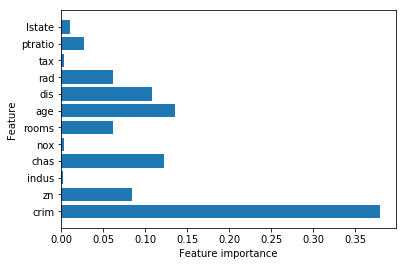

In [36]:
import matplotlib.pyplot as plt

def plot_feature_importances(model, feature_name):
    n_features = model_data.shape[1]-1
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_name)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

names = ('crim', 'zn', 'indus', 'chas', 'nox', 'rooms', 'age', 'dis', 
         'rad', 'tax', 'ptratio', 'lstate')
plot_feature_importances(rnd, names)

The top 3 leading explainatory variables identified by the Random Forest model are: crim, age, and chas.

*Apply the better-performed Gradient Boosting Regressing model to the full data set.*

In [37]:
gbr = GradientBoostingRegressor(max_depth=5, n_estimators=500, 
                                learning_rate=0.1, random_state=RANDOM_SEED)
gbr.fit(X, y) 
y_predict_1 = gbr.predict(X)

*Calculate performance metrics: (1) explained variance score; (2) rmse*

In [38]:
mse_gbr = mean_squared_error(y, y_predict_1)
rmse_gbr = sqrt(mse_gbr)
evs_gbr = explained_variance_score(y, y_predict_1)  

print('\n----------------------------------------------')
print('The RMSE of Gradient Boosting Regression Model is: {:.4f}'.format(rmse_gbr))     
print('The explained variance score of Gradient Boosting' 
      'Regression Model is: {:.4f}'.format(evs_gbr)) 


----------------------------------------------
The RMSE of Gradient Boosting Regression Model is: 0.0377
The explained variance score of Gradient BoostingRegression Model is: 1.0000


After applying the preferred Gradient Boosting model to the full dataset, the RMSE is significantly improved in comparison to its performance on the test set. The model reached a perfect 1.0 explained variance score on the full data set. It outperforms the Random Forest model. Therefore, I will recommend the management to use Gradient Boosting method. 

*Calcualte feature_importance_score to identify variables that are important in predicting the home price*

In [39]:
print("Feature importances of Gradient Boosting Regression Model:\n{}"
      .format(gbr.feature_importances_))

Feature importances of Gradient Boosting Regression Model:
[6.32111496e-01 3.15261829e-02 5.35752505e-04 7.17299135e-03
 2.95934672e-03 1.65044114e-02 1.92788980e-01 5.52784355e-02
 4.16122245e-02 4.10332659e-03 7.03958428e-03 8.36726874e-03]


*Visualize the feature_importance_score with pre-defined function.* 

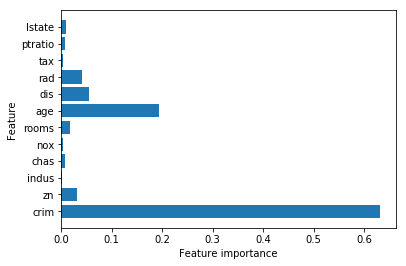

In [40]:
plot_feature_importances(gbr, names)

The top 3 leading explainatory variables identified by the Gradient Boosting model are: crim, age, and dis.

Both models identified crim as the most important indicator for housing value. Age is also recognized by both models as the second most import explainatory variable. 